In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/drugs_2020_simply_imputed.csv')

In [3]:
df.head()

,accgdln,age,altdum,amttotal,casetype,citwhere,combdrg2,crimhist,disposit,district,...,typemony,typeoths,unit1,mwgt1,wgt1,xcrhissr,xfolsor,xmaxsor,xminsor,sentrnge
0,1.0,20.0,0,0,1.0,211.0,6.0,1.0,1,43,...,1.0,0,1.0,6.356099e+07,85104.433315,1.0,17.0,30.0,24.0,8.0
1,1.0,64.0,0,0,1.0,211.0,1.0,1.0,1,51,...,1.0,0,1.0,1.193400e+06,5967.000000,3.0,27.0,108.0,87.0,0.0
2,1.0,28.0,0,0,1.0,211.0,3.0,1.0,1,48,...,1.0,0,2.0,2.000000e+06,2000.000000,6.0,27.0,162.0,130.0,2.0
3,2.0,55.0,0,0,1.0,211.0,77.0,1.0,1,65,...,1.0,0,1.0,1.030000e+04,4.120000,5.0,13.0,37.0,30.0,0.0
4,1.0,30.0,0,0,1.0,211.0,6.0,1.0,1,87,...,1.0,0,1.0,1.692000e+05,84.600000,6.0,25.0,137.0,110.0,2.0


In [4]:
df.columns

Index(['accgdln', 'age', 'altdum', 'amttotal', 'casetype', 'citwhere',
       'combdrg2', 'crimhist', 'disposit', 'district', 'drugmin', 'dsplea',
       'educatn', 'intdum', 'methmin', 'monrace', 'monsex', 'mweight',
       'newcit', 'newcnvtn', 'neweduc', 'newrace', 'nodrug', 'numdepen',
       'offguide', 'prisdum', 'probatn', 'probdum', 'quarter', 'reas1',
       'reas2', 'reas3', 'regsxmin', 'relmin', 'restdet1', 'restdum', 'safe',
       'safety', 'senspcap', 'sensplt0', 'sentimp', 'smax1', 'smin1',
       'sources', 'statmax', 'statmin', 'supermax', 'supermin', 'suprdum',
       'suprel', 'timservc', 'totchpts', 'totrest', 'totunit', 'typemony',
       'typeoths', 'unit1', 'mwgt1', 'wgt1', 'xcrhissr', 'xfolsor', 'xmaxsor',
       'xminsor', 'sentrnge'],
      dtype='object')

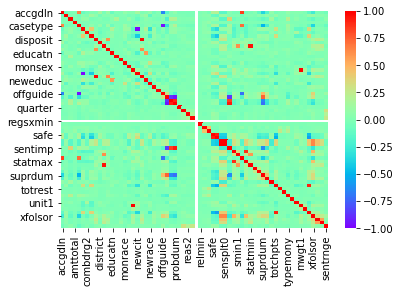

In [5]:
sns.heatmap(df.corr(),  vmin = -1, vmax = 1, cmap = 'rainbow');

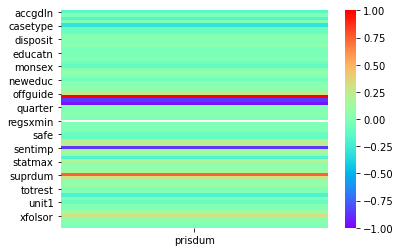

<Figure size 2160x1080 with 0 Axes>

In [6]:
sns.heatmap(df.corr()[['prisdum']], vmin = -1, vmax = 1, cmap = 'rainbow');
plt.figure(figsize = (30, 15));

At a glance, it seems as though we have a few "hotspots" of internally correlated features and features that are highly correlated with our target.

In [7]:
# Features highly correlated with our target:
target_corr_feats = [feat for feat in df.columns if abs(df.corr().loc['prisdum', feat]) >= 0.5]

In [8]:
target_corr_feats

['prisdum', 'probatn', 'probdum', 'sentimp', 'suprdum']

In [9]:
int_corr_feats = {feat:[feature for feature in df.columns if abs(df.corr().loc[feat, feature]) >= 0.5]
                 for feat in df.columns}

In [10]:
int_corr_feats

{'accgdln': ['accgdln', 'casetype', 'offguide', 'sources'],
 'age': ['age'],
 'altdum': ['altdum'],
 'amttotal': ['amttotal'],
 'casetype': ['accgdln', 'casetype', 'offguide', 'sources'],
 'citwhere': ['citwhere', 'newcit'],
 'combdrg2': ['combdrg2'],
 'crimhist': ['crimhist'],
 'disposit': ['disposit', 'dsplea', 'newcnvtn'],
 'district': ['district'],
 'drugmin': ['drugmin', 'smin1', 'statmin'],
 'dsplea': ['disposit', 'dsplea', 'newcnvtn'],
 'educatn': ['educatn', 'neweduc'],
 'intdum': ['intdum'],
 'methmin': ['methmin'],
 'monrace': ['monrace'],
 'monsex': ['monsex'],
 'mweight': ['mweight', 'mwgt1'],
 'newcit': ['citwhere', 'newcit'],
 'newcnvtn': ['disposit', 'dsplea', 'newcnvtn'],
 'neweduc': ['educatn', 'neweduc'],
 'newrace': ['newrace'],
 'nodrug': ['nodrug'],
 'numdepen': ['numdepen'],
 'offguide': ['accgdln', 'casetype', 'offguide', 'sources'],
 'prisdum': ['prisdum', 'probatn', 'probdum', 'sentimp', 'suprdum'],
 'probatn': ['prisdum', 'probatn', 'probdum', 'sentimp', 'supr

We should definitely use pca for dimensionality reduction and also to decorrelate features when modeling.

In [11]:
df['prisdum'].value_counts(normalize = True)
# Classes are quite imbalanced

1    0.955196
0    0.044804
Name: prisdum, dtype: float64

In [32]:
df['regsxmin'].dtype

dtype('int64')

In [13]:
df.columns

Index(['accgdln', 'age', 'altdum', 'amttotal', 'casetype', 'citwhere',
       'combdrg2', 'crimhist', 'disposit', 'district', 'drugmin', 'dsplea',
       'educatn', 'intdum', 'methmin', 'monrace', 'monsex', 'mweight',
       'newcit', 'newcnvtn', 'neweduc', 'newrace', 'nodrug', 'numdepen',
       'offguide', 'prisdum', 'probatn', 'probdum', 'quarter', 'reas1',
       'reas2', 'reas3', 'regsxmin', 'relmin', 'restdet1', 'restdum', 'safe',
       'safety', 'senspcap', 'sensplt0', 'sentimp', 'smax1', 'smin1',
       'sources', 'statmax', 'statmin', 'supermax', 'supermin', 'suprdum',
       'suprel', 'timservc', 'totchpts', 'totrest', 'totunit', 'typemony',
       'typeoths', 'unit1', 'mwgt1', 'wgt1', 'xcrhissr', 'xfolsor', 'xmaxsor',
       'xminsor', 'sentrnge'],
      dtype='object')

In [14]:
len(df.columns)

64